In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [253]:
train_data=pd.read_csv('train_data.csv')

In [254]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              39499 non-null  int64  
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       39499 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

In [255]:
train_data.drop("Unnamed: 0",axis=1, inplace=True)

In [256]:
train_data

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,Apartment,106,2.000000,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,Apartment,733,4.000000,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,Apartment,737,3.000000,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,Apartment,900,14.000000,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,Bungalow,2238,3.000000,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39494,Single-family home,1120,1.525186,2,NaN,0.0,No,All time,5.55,Slightly above average,Medium,80.0,3.56,73.43
39495,Apartment,445,2.492152,3,Fully Furnished,1.0,No,All time,5.70,Slightly above average,Medium,86.0,2.93,79.91
39496,Bungalow,3780,2.492039,6,Unfurnished,0.0,Yes,Once in two days,6.84,Well below average,Medium,137.0,3.80,81.44
39497,Single-family home,1266,3.505327,1,Semi_Furnished,0.0,No,Once in a day - Morning,4.60,Slightly above average,NaN,88.0,3.25,71.33


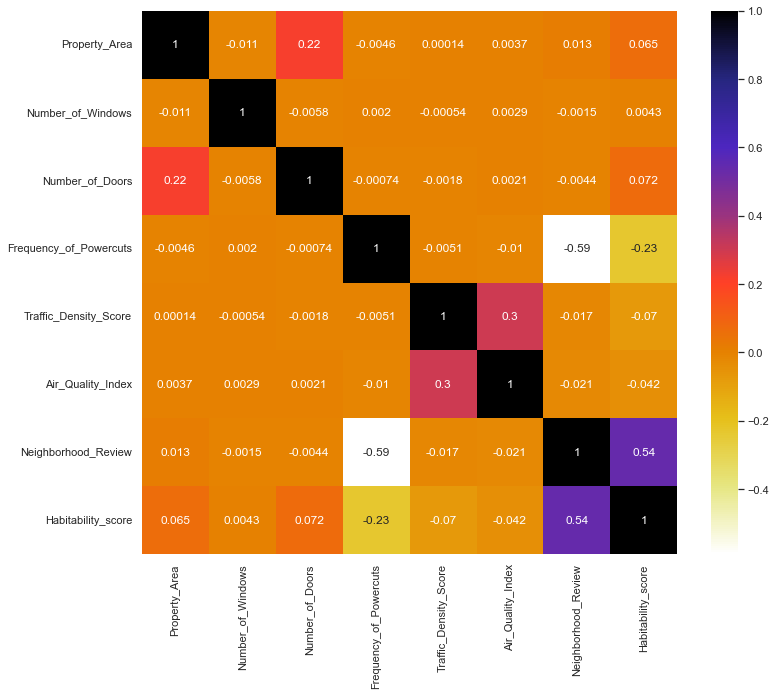

In [257]:
plt.figure(figsize=(12,10))
cor = train_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [258]:
data_for_powercuts=train_data[['Frequency_of_Powercuts','Neighborhood_Review']]

In [259]:
non_nan_data_for_powercuts=data_for_powercuts.dropna()
non_nan_data_for_powercuts.shape

(38116, 2)

In [260]:
x_train=non_nan_data_for_powercuts.drop('Frequency_of_Powercuts',axis=1)

In [261]:
x_train.shape

(38116, 1)

In [262]:
y_train=non_nan_data_for_powercuts['Frequency_of_Powercuts']
non_nan_data_for_powercuts.shape

(38116, 2)

In [263]:
nan_data_for_powercuts=data_for_powercuts[data_for_powercuts["Frequency_of_Powercuts"].isnull()]

In [264]:
x_test=nan_data_for_powercuts.drop('Frequency_of_Powercuts',axis=1)
x_test

,Neighborhood_Review
36,3.80
58,4.77
126,4.17
137,3.52
151,4.18
...,...
39413,4.49
39431,4.72
39437,3.21
39438,3.82


In [265]:
from sklearn.linear_model import LinearRegression

x_test.reset_index(inplace=True, drop=True)
x_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)


In [266]:
lr=LinearRegression()

In [267]:
lr.fit(x_train,y_train)

LinearRegression()

In [268]:
y_pred=lr.predict(x_test)

In [269]:
y_pred

array([ 0.44901697, -0.09167616,  0.2427732 , ...,  0.77789218,
        0.43786866,  0.22605073])

In [270]:
y_pred.reshape(1,1383)

array([[ 0.44901697, -0.09167616,  0.2427732 , ...,  0.77789218,
         0.43786866,  0.22605073]])

In [271]:
x_test['Frequency_of_Powercuts'] = y_pred.tolist()

In [272]:
x_test.reset_index(inplace=True, drop=True)
x_test


,Neighborhood_Review,Frequency_of_Powercuts
0,3.80,0.449017
1,4.77,-0.091676
2,4.17,0.242773
3,3.52,0.605093
4,4.18,0.237199
...,...,...
1378,4.49,0.064400
1379,4.72,-0.063805
1380,3.21,0.777892
1381,3.82,0.437869


In [273]:
x_train=pd.concat([x_train,y_train], axis=1)

In [274]:
new_data=pd.concat([x_train,x_test], axis=0,ignore_index=True)

In [275]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood_Review     39499 non-null  float64
 1   Frequency_of_Powercuts  39499 non-null  float64
dtypes: float64(2)
memory usage: 617.3 KB


In [276]:
train_data['Frequency_of_Powercuts'] = new_data['Frequency_of_Powercuts']

In [277]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Type           39499 non-null  object 
 1   Property_Area           39499 non-null  int64  
 2   Number_of_Windows       39499 non-null  float64
 3   Number_of_Doors         39499 non-null  int64  
 4   Furnishing              38457 non-null  object 
 5   Frequency_of_Powercuts  39499 non-null  float64
 6   Power_Backup            39499 non-null  object 
 7   Water_Supply            39499 non-null  object 
 8   Traffic_Density_Score   39499 non-null  float64
 9   Crime_Rate              38712 non-null  object 
 10  Dust_and_Noise          38280 non-null  object 
 11  Air_Quality_Index       39499 non-null  float64
 12  Neighborhood_Review     39499 non-null  float64
 13  Habitability_score      39499 non-null  float64
dtypes: float64(6), int64(2), object(6)
mem

In [279]:
train_data.to_csv('train_data_1.csv')